In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
w1 = [[0, 0, 2, 3, 3, 3], [0, 1, 2, 1, 2, 3]]
w2 = [[6, 8, 9, 9, 9, 8], [9, 9, 8, 9,10,11]]
z = [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
sigma1 = [[0.0, 0.0], [0.0, 0.0]]
sigma2 = [[0.0, 0.0], [0.0, 0.0]]
g1 = [0, 0, 0, 0, 0, 0]
g2 = [0, 0, 0, 0, 0, 0]

In [3]:
print("Bit 1")
p1 = float(1.0*len(w1[0])/(len(w1[0])+len(w2[0])))
p2 = float(1.0-p1)
print("P(w1) =", p1)
print("P(w2) =", p2)

Bit 1
P(w1) = 0.5
P(w2) = 0.5


In [4]:
print("Bit 2")
mu1 = [[0],[0]]
mu2 = [[0],[0]]
for i in range(0,len(w1[0])):
    mu1[0][0] = mu1[0][0] + w1[0][i]
    mu1[1][0] = mu1[1][0] + w1[1][i]
    mu2[0][0] = mu2[0][0] + w2[0][i]
    mu2[1][0] = mu2[1][0] + w2[1][i]
mu1[0][0] = float(1.0*mu1[0][0]/len(w1[0]))
mu1[1][0] = float(1.0*mu1[1][0]/len(w1[1]))
mu2[0][0] = float(1.0*mu2[0][0]/len(w2[0]))
mu2[1][0] = float(1.0*mu2[1][0]/len(w2[1]))
mu1 = np.array(mu1)
mu2 = np.array(mu2)
print("Mean Matrix mu1 =\n",mu1)
print("Mean Matrix mu2 =\n",mu2)

Bit 2
Mean Matrix mu1 =
 [[ 1.83333333]
 [ 1.5       ]]
Mean Matrix mu2 =
 [[ 8.16666667]
 [ 9.33333333]]


In [5]:
print("\nCovariance matrix of class 1:")
for i in range(0,6):
    z[0][i] = float(w1[0][i] - mu1[0][0])
    z[1][i] = float(w1[1][i] - mu1[1][0])
z = np.array(z)
zt = np.transpose(z)
sigma1 = np.matmul(z, zt)
sigma1 = sigma1/6
print(sigma1)


Covariance matrix of class 1:
[[ 1.80555556  0.91666667]
 [ 0.91666667  0.91666667]]


In [6]:
print("\nCovariance matrix of class 2:")
for i in range(0,6):
    z[0][i] = float(w2[0][i] - mu2[0][0])
    z[1][i] = float(w2[1][i] - mu2[1][0])
z = np.array(z)
zt = np.transpose(z)
sigma2 = np.matmul(z, zt)
sigma2 = sigma2/6
print(sigma2)


Covariance matrix of class 2:
[[ 1.13888889 -0.05555556]
 [-0.05555556  0.88888889]]


In [7]:
print("\nBit 3:")

sigmai1 = np.linalg.inv(sigma1)
sigmai2 = np.linalg.inv(sigma2)

Ai = -sigmai1/2
Bi = np.transpose(np.matmul(sigmai1, mu1))
g1[0] = Ai[0][0]
g1[1] = Ai[1][0] + Ai[0][1]
g1[2] = Ai[1][1]
g1[3] = Bi[0][0]
g1[4] = Bi[0][1]
const = -np.matmul(np.matmul(np.transpose(mu1), sigmai1), mu1)/2
const = const - math.log(np.linalg.det(sigma1))/2
const = const + math.log(p1)
g1[5] = const[0][0]
print("\n\n")
print("g1(x) =", g1[0], "x1^2 +", g1[1], "x1x2 +", g1[2], "x2^2 +", g1[3], "x1 +", g1[4], "x2 +", g1[5])
print("\n\n")


Bit 3:



g1(x) = -0.5625 x1^2 + 1.125 x1x2 + -1.10795454545 x2^2 + 0.375 x1 + 1.26136363636 x2 + -1.88052270151





In [8]:
Ai = -sigmai2/2
Bi = np.transpose(np.matmul(sigmai2, mu2))
g2[0] = Ai[0][0]
g2[1] = Ai[1][0] + Ai[0][1]
g2[2] = Ai[1][1]
g2[3] = Bi[0][0]
g2[4] = Bi[0][1]
const = -np.matmul(np.matmul(np.transpose(mu2), sigmai2), mu2)/2
const = const - math.log(np.linalg.det(sigma2))/2
const = const + math.log(p2)
g2[5] = const[0][0]
print("g2(x) =", g2[0], "x1^2 +", g2[1], "x1x2 +", g2[2], "x2^2 +", g2[3], "x1 +", g2[4], "x2 +", g2[5])

g2(x) = -0.440366972477 x1^2 + -0.0550458715596 x1x2 + -0.564220183486 x2^2 + 7.70642201835 x1 + 10.9816513761 x2 + -83.4133518384


In [9]:
print("\n\n")
print("Boundary equation is:")
g3 = np.subtract(g1, g2)
print(g3[0], "x1^2 +", g3[1], "x1x2 +", g3[2], "x2^2 +", g3[3], "x1 +", g3[4], "x2 +", g3[5], "= 0")




Boundary equation is:
-0.122133027523 x1^2 + 1.18004587156 x1x2 + -0.543734361968 x2^2 + -7.33142201835 x1 + -9.72028773978 x2 + 81.5328291369 = 0


In [10]:
mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['k'])
x = np.linspace(-90, 90, 400)
y = np.linspace(-50, 50, 400)
x, y = np.meshgrid(x, y)

In [11]:
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

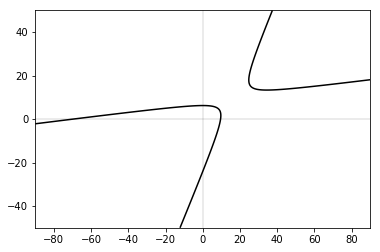

In [12]:
axes()
plt.contour(x, y,(g3[0]*x**2 + g3[1]*x*y + g3[2]*y**2 + g3[3]*x + g3[4]*y + g3[5]), [0], colors='k')
plt.show()